In [3]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score

# input file path
datasetdir = "/home/jnbera43/Naya_Lynx/data"
resultdir = "/home/jnbera43/Naya_Lynx/Model_generation"

from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

drug_list = ["AEW541","Erlotinib","17-AAG","AZD0530"]

Starttime: 20240215


AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2024-02-15 21:51:19.328617
EndTime : 2024-02-15 21:51:57.310343
AEW541’s final rmse value is = 0.892669
AEW541 R-squared value is = -0.086768
Erlotinib_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2024-02-15 21:51:57.444965
EndTime : 2024-02-15 21:52:23.910525
Erlotinib’s final rmse value is = 0.787975
Erlotinib R-squared value is = -0.389539
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2024-02-15 21:52:24.045449
EndTime : 2024-02-15 21:53:03.233947
17-AAG’s final rmse value is = 1.821962
17-AAG R-squared value is = -0.133659
AZD0530_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2024-02-15 21:53:03.373067


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


EndTime : 2024-02-15 21:53:36.861673
AZD0530’s final rmse value is = 0.907496
AZD0530 R-squared value is = -0.068480


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


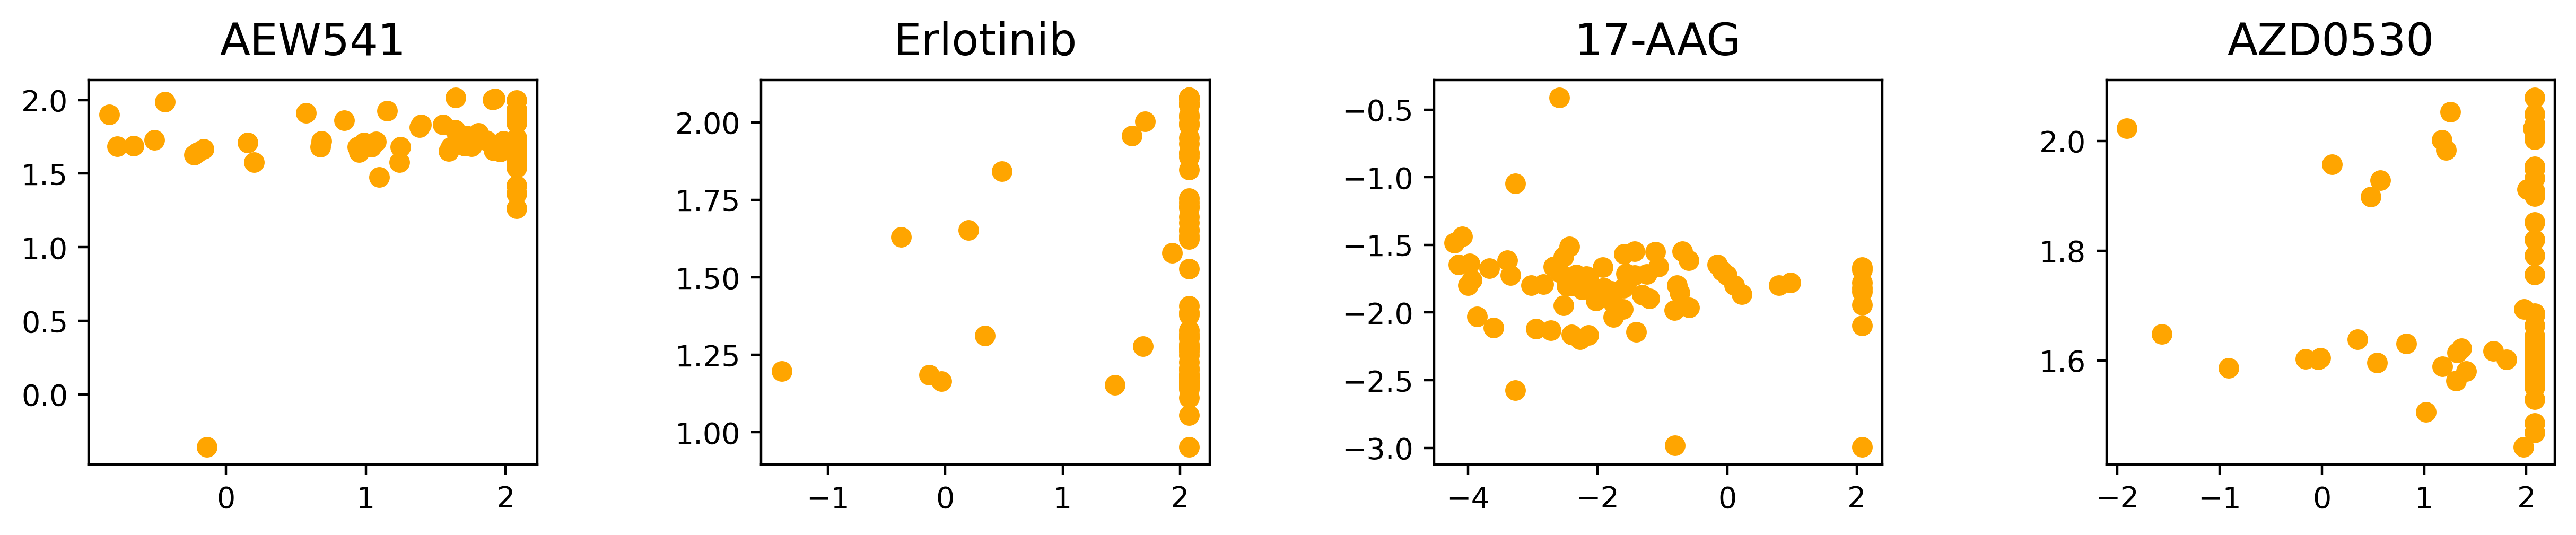

In [4]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('drug: %s' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "/mutation_%s.npz" % dname)
    ss0 = np.load(datasetdir + '/mutation_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    rf = RandomForestRegressor(random_state = 84)
    # Train the model on training data
    rf.fit(train_X, train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = rf.predict(test_X)
    predicted_value = predicted_classes
        
        
    import pickle
    import joblib
    joblib.dump(rf, resultdir + '/RF/mutation_RF_%s.pkl' % dname) 
            
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '/RF/predicted_table/mutation_RF_%s_pred_and_val_result.csv' % dname, index=False)


    
    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1